In [ ]:
# Note - These new features added with respect to this test are reducing the perfomance.

Name of the feature is 

magnitudeTimesScarcity_by_prior_holidays_pow_3


In [1]:
dataName = 'adani'
dataFrequency = '1h'
requiredMinimumCorrelation = .2
autoConfigFileRelativePath = '\\src\config\\autoConfig\\config.json'
KEY_finalTrainingFeaturesListFile='finalTrainingFeaturesListFile'
KEY_manuallyDecidedTrainingFeaturesListFile='manuallyDecidedTrainingFeaturesListFile'
prefixFor_KEY_manuallyDecidedTrainingFeaturesListFile = '004'
TIME_STEPS_CONFIG=60
BATCH_SIZE_CONFIG = 512
LEARNING_RATE_CONFIG=0.01
EPOCHS_CONFIG = 20
print('done')

done


In [2]:
# Include python files defined in the library folder to help facilitate the stock price Prediction 
import os
import sys  

module_path = os.path.abspath('../../'+os.path.join('.'))

sys.path.append(module_path)

from utilities import *
from trainModel import *

print('done')

done


In [3]:
import pandas as pd
import numpy as np

from utilities.environment import getAutoConfigData
from utilities.fileFolderManipulations import getJupyterRootDirectory

configFilePath = getJupyterRootDirectory()+'\\'+autoConfigFileRelativePath
autoConfigData = getAutoConfigData(configFilePath)

trainingDataFilePath = autoConfigData[dataName][dataFrequency][KEY_manuallyDecidedTrainingFeaturesListFile]
trainingDataFilePath = trainingDataFilePath.replace('***',prefixFor_KEY_manuallyDecidedTrainingFeaturesListFile)

trainingDataDf = pd.read_csv(trainingDataFilePath)

try:
    trainingDataDf=trainingDataDf.drop(columns={'Unnamed: 0'})
except KeyError:
    pass

trainingDataDf.head()

 retrieving values configured in >>> C:\Users\kalagi01\Desktop\dev\eraiVersion2\\src\config\autoConfig\config.json


,open,high,low,close,open_high_diff_exp_1,open_low_diff_exp_inv_1,close_low_diff_exp_inv_2,close_high_diff_exp_1,high_low_diff_exp_inv_2,open_close_mid,open_high_mid,open_low_mid,close_high_mid,close_low_mid,high_low_mid,data_magnitude,magnitudeTimesScarcity_by_prior_holidays_pow_3
0,52.50,52.70,51.30,51.65,0.818731,0.301194,0.496585,0.349938,0.060810,52.075,52.600,51.900,52.175,51.475,52.000,26.020368,0.0
1,51.70,52.30,51.70,51.85,0.548812,1.000000,0.740818,0.637628,0.301194,51.775,52.000,51.700,52.075,51.775,52.000,25.944041,0.0
2,51.85,52.10,51.75,51.95,0.778801,0.904837,0.670320,0.860708,0.496585,51.900,51.975,51.800,52.025,51.850,51.925,25.956331,0.0
3,51.90,52.15,51.90,52.05,0.778801,1.000000,0.740818,0.904837,0.606531,51.975,52.025,51.900,52.100,51.975,52.025,26.000054,0.0
4,52.10,52.20,51.85,51.90,0.904837,0.778801,0.904837,0.740818,0.496585,52.000,52.150,51.975,52.050,51.875,52.025,26.006348,0.0


In [4]:
from utilities.dataVisuvalization import displayHeatMap
displayHeatMap(trainingDataDf.corr())
print('done')

done


In [5]:
numberOfInputFeatures = trainingDataDf.shape[1]
numberOfOutputFeatures = 4

numberOfInputFeatures,numberOfOutputFeatures

(17, 4)

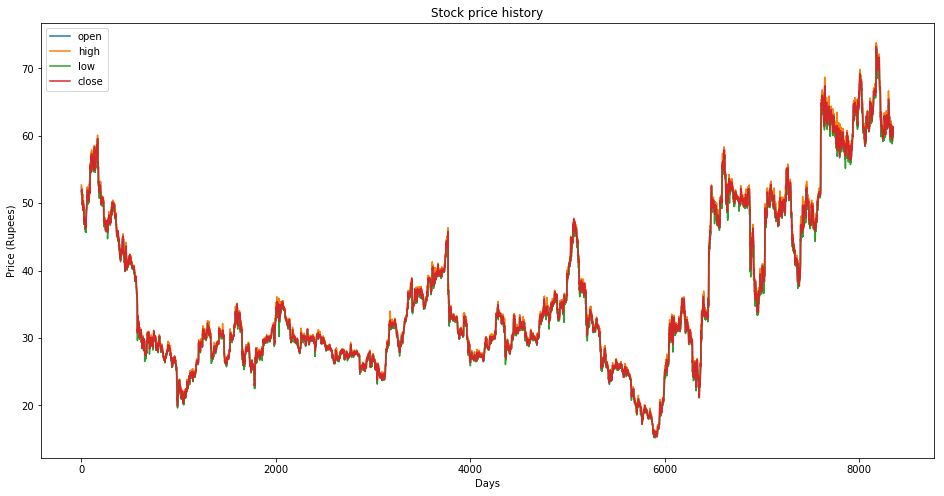

done


In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(trainingDataDf["open"])
plt.plot(trainingDataDf["high"])
plt.plot(trainingDataDf["low"])
plt.plot(trainingDataDf["close"])
plt.title('Stock price history')
plt.ylabel('Price (Rupees)')
plt.xlabel('Days')
plt.legend(['open','high','low','close'], loc='upper left')
plt.show()
print('done')

Using TensorFlow backend.
W0110 20:44:21.662306  8884 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0110 20:44:21.722308  8884 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0110 20:44:21.728310  8884 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



checking if any null values are present
 open                                              0
high                                              0
low                                               0
close                                             0
open_high_diff_exp_1                              0
open_low_diff_exp_inv_1                           0
close_low_diff_exp_inv_2                          0
close_high_diff_exp_1                             0
high_low_diff_exp_inv_2                           0
open_close_mid                                    0
open_high_mid                                     0
open_low_mid                                      0
close_high_mid                                    0
close_low_mid                                     0
high_low_mid                                      0
data_magnitude                                    0
magnitudeTimesScarcity_by_prior_holidays_pow_3    0
dtype: int64
Train and Test size 5010 3340
length of time-series i/o (4950,

W0110 20:44:22.142333  8884 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



 checking if folder existis >>>C:\Users\kalagi01\Desktop\dev\eraiVersion2\data\adani\processed\1h\features\manuallyDecidedFeatures/logs


W0110 20:44:22.482825  8884 deprecation.py:323] From C:\Users\kalagi01\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0110 20:44:23.088383  8884 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0110 20:44:23.096384  8884 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 4608 samples, validate on 1536 samples
Epoch 1/20
 - 2s - loss: 0.0625 - acc: 0.2350 - val_loss: 0.0837 - val_acc: 0.0430
Epoch 2/20
 - 1s - loss: 0.0429 - acc: 0.1604 - val_loss: 0.0691 - val_acc: 0.3542
Epoch 3/20
 - 1s - loss: 0.0400 - acc: 0.5942 - val_loss: 0.0642 - val_acc: 0.4883
Epoch 4/20
 - 1s - loss: 0.0376 - acc: 0.5951 - val_loss: 0.0607 - val_acc: 0.4909
Epoch 5/20
 - 1s - loss: 0.0362 - acc: 0.6044 - val_loss: 0.0580 - val_acc: 0.4909
Epoch 6/20
 - 1s - loss: 0.0348 - acc: 0.5614 - val_loss: 0.0556 - val_acc: 0.4642
Epoch 7/20
 - 1s - loss: 0.0339 - acc: 0.5054 - val_loss: 0.0529 - val_acc: 0.4648
Epoch 8/20
 - 1s - loss: 0.0320 - acc: 0.5462 - val_loss: 0.0497 - val_acc: 0.4551
Epoch 9/20
 - 1s - loss: 0.0304 - acc: 0.4915 - val_loss: 0.0452 - val_acc: 0.4479
Epoch 10/20
 - 1s - loss: 0.0269 - acc: 0.4701 - val_loss: 0.0390 - val_acc: 0.4323
Epoch 11/20
 - 1s - loss: 0.0223 - acc: 0.4709 - val_loss: 0.0298 - val_acc: 0.4232
Epoch 12/20
 - 1s - loss: 0.0153 - ac

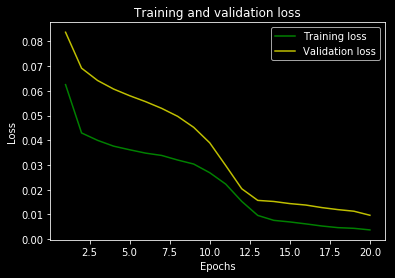

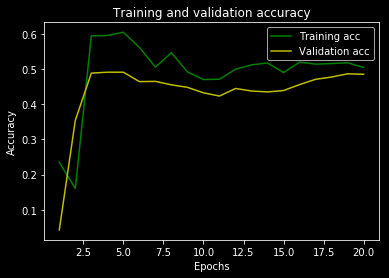

isSuccess >>> True


In [7]:
from trainModel.trainModel import trainLSTMModel
success, trainingData, min_max_scaler, x_t, y_t,x_test_t, y_test_t, lstm_model, history = trainLSTMModel(trainingDataFilePath, TIME_STEPS_CONFIG=60, BATCH_SIZE_CONFIG = 512, LEARNING_RATE_CONFIG=0.001, EPOCHS_CONFIG = 20)
print('isSuccess >>> ' + str(success))

In [8]:
predicted_values = lstm_model.predict(x_test_t, batch_size=512)
predicted_values.shape

(1536, 4)

In [9]:
dummy_cols_data = np.random.random((predicted_values.shape[0],numberOfInputFeatures-numberOfOutputFeatures))
predicted_values_adj = np.append(predicted_values, dummy_cols_data, 1)
predicted_values_orig_scale_withDummies=min_max_scaler.inverse_transform(predicted_values_adj)

y_test_t_adj = np.append(y_test_t, dummy_cols_data, 1)
y_test_t_orig_scale_withDummies=min_max_scaler.inverse_transform(y_test_t_adj)
print('done')

done


In [10]:
predicted_values_orig_scale= predicted_values_orig_scale_withDummies[:, [i+1 for i in range(numberOfOutputFeatures)]] #[1,2,3,4]
y_test_t_orig_scale= y_test_t_orig_scale_withDummies[:, [i+1 for i in range(numberOfOutputFeatures)]] #[1,2,3,4]
predicted_values_orig_scale.shape

(1536, 4)

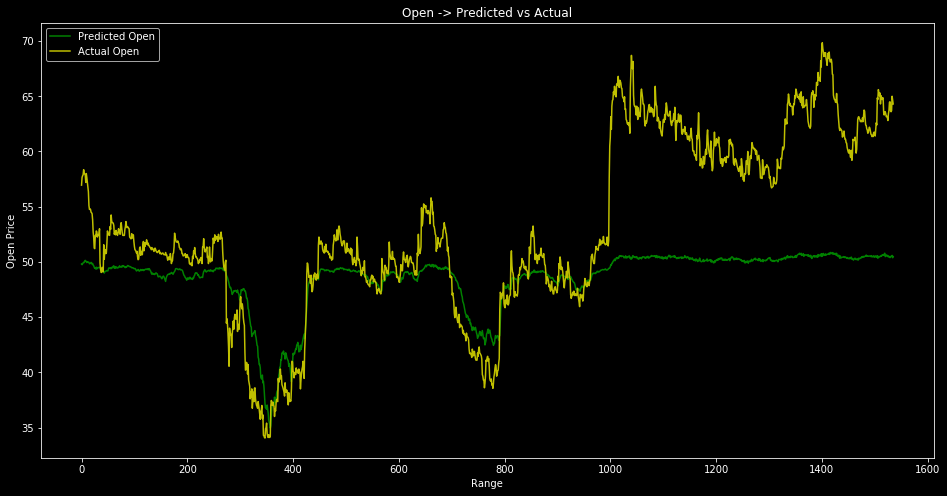

In [11]:
plt.figure(figsize=(16,8))
plt.clf()
predicted_open = predicted_values_orig_scale[:,[0]]
actual_open = y_test_t_orig_scale[:,[0]]

x_coord = [ index for index in range(predicted_values_orig_scale.shape[0]) ]

plt.plot(x_coord, predicted_open, 'g', label='Predicted Open')
plt.plot(x_coord, actual_open, 'y', label='Actual Open')
plt.title('Open -> Predicted vs Actual')
plt.xlabel('Range')
plt.ylabel('Open Price')
plt.legend()
plt.show()